In [1]:
import pandas as pd
import seaborn as sns
import re
from wordcloud import WordCloud, STOPWORDS 
#import nltk
#from nltk.corpus import stopwords
import matplotlib.pyplot as plt 
from collections import Counter 
from nltk.stem.porter import PorterStemmer
stopwords = set(STOPWORDS)

In [2]:
train = pd.read_csv('./dataset/Constraint_English_Train - Sheet1.csv')
val = pd.read_csv('./dataset/Constraint_English_Val - Sheet1.csv')
test = pd.read_csv('./dataset/english_test_with_labels - Sheet1.csv')

In [3]:
dataset = pd.concat([train, val, test], ignore_index=True)

In [4]:
dataset.head()

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10700 entries, 0 to 10699
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10700 non-null  int64 
 1   tweet   10700 non-null  object
 2   label   10700 non-null  object
dtypes: int64(1), object(2)
memory usage: 250.9+ KB


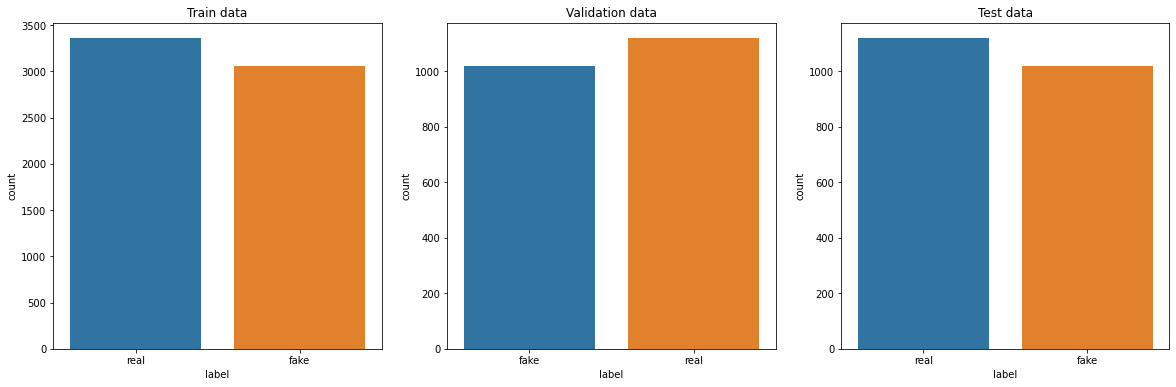

In [6]:
fig, ax = plt.subplots(1,3, figsize=(20, 6))
sns.countplot(x=train['label'], ax=ax[0]).set(title="Train data")
sns.countplot(x=val['label'], ax=ax[1]).set(title="Validation data")
sns.countplot(x=test['label'], ax=ax[2]).set(title="Test data")
plt.show()


In [7]:
all_tweets = dataset['tweet']
fake_tweets = dataset[dataset['label'] == 'fake']['tweet']
real_tweets = dataset[dataset['label'] == 'true']['tweet']

In [8]:
# stops = set(stopwords.words("english"))
stops = stopwords
def cleantext(string):
    text = string.lower().split()
    text = " ".join(text)
    text = text.replace('’s','')
    text = re.sub(r"http(\S)+",' ',text)    
    text = re.sub(r"www(\S)+",' ',text)
    text = re.sub(r"&",' and ',text)  
    text = text.replace('&amp',' ')
    text = re.sub(r"[^0-9a-zA-Z]+",' ',text)
    text = text.split()
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text

In [9]:
def concat_all_sentences(sents):
    all_tokens = ''
    for text in sents:
        #cleantext(text)
        # tx = re.sub(r'http\S+', '', text)
        # tx = str(tx).lower().strip()
        # tx = tx.replace('\n',' ')
        # tx = tx.replace('&amp',' ')
        # tx = tx.replace('#','')
        # tx = tx.replace('-','')
        # tx = tx.replace(';','')
        # tx = " ".join(tx.split())
        all_tokens += cleantext(text) + " "
    return all_tokens

In [10]:
all_tokens = concat_all_sentences(all_tweets)
fake_tokens = concat_all_sentences(fake_tweets)   
real_tokens = concat_all_sentences(real_tweets)

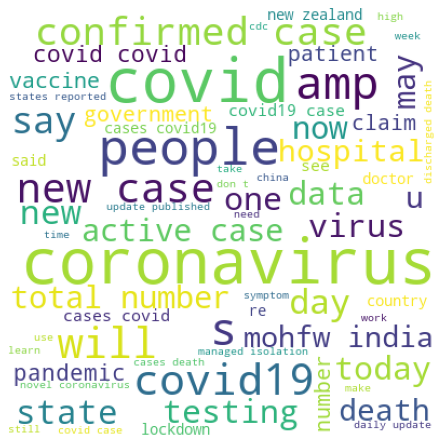

In [11]:
wordcloud = WordCloud(width = 400, height = 400, 
            background_color ='white',  
            min_font_size = 10).generate(all_tokens) 

# plot the WordCloud image                        
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

In [12]:
all_tokens_words = [w for w in all_tokens.split() if w not in stopwords]
fake_tokens_words = [w for w in fake_tokens.split() if w not in stopwords]
real_tokens_words = [w for w in real_tokens.split() if w not in stopwords]

In [13]:
Counter(all_tokens_words).most_common(20)

[('covid', 3942),
 ('19', 3345),
 ('cases', 2872),
 ('coronavirus', 2755),
 ('covid19', 2472),
 ('new', 1824),
 ('people', 1285),
 ('india', 1259),
 ('s', 1228),
 ('tests', 1202),
 ('deaths', 1092),
 ('1', 1062),
 ('states', 1028),
 ('total', 898),
 ('2', 897),
 ('number', 877),
 ('confirmed', 829),
 ('amp', 822),
 ('will', 822),
 ('testing', 797)]